# **Crop and Fertilizer Recommendation System using ML**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [69]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [70]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [72]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [75]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [76]:
#target feature distribution
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [77]:
features = df.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


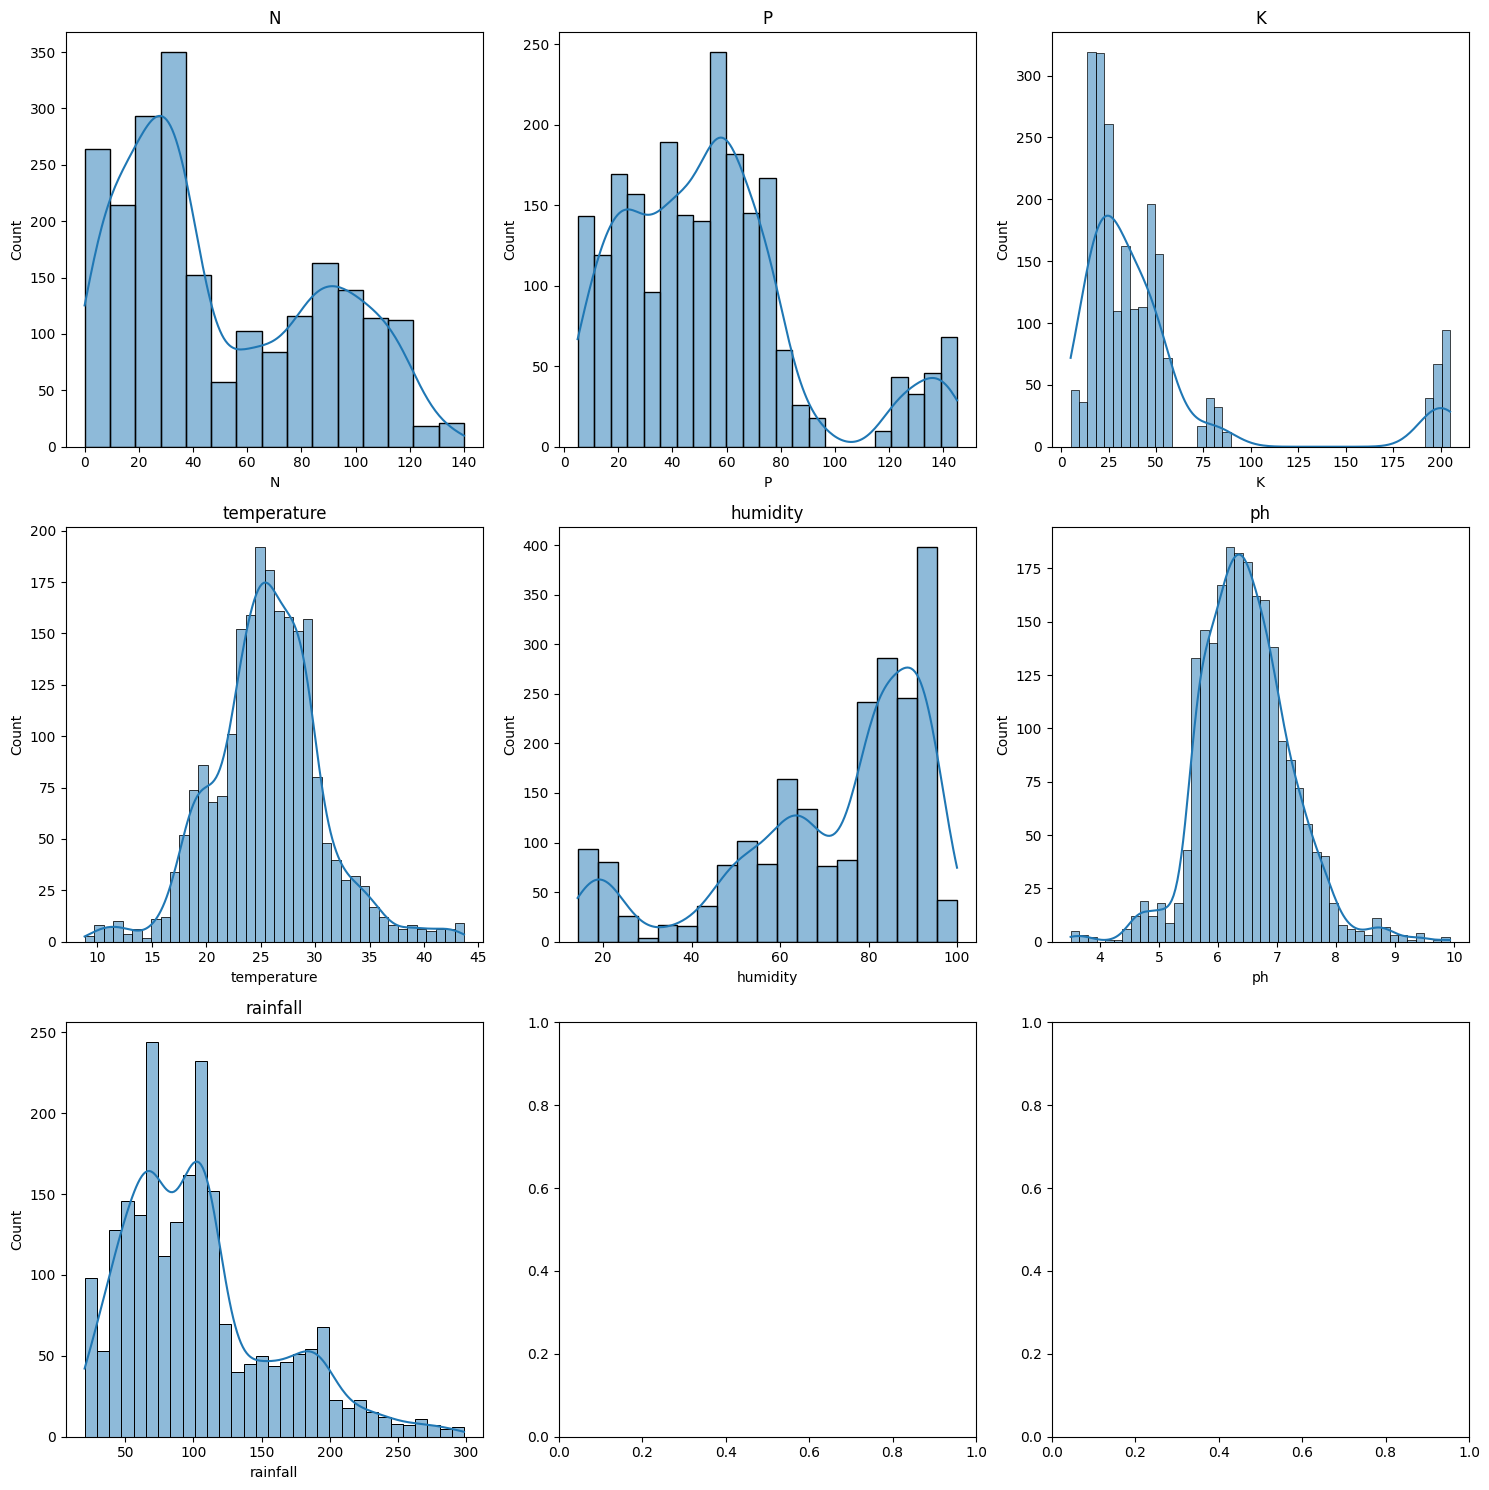

In [78]:
# Visualize the distribution of all features

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(df[i], ax=subplot , kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

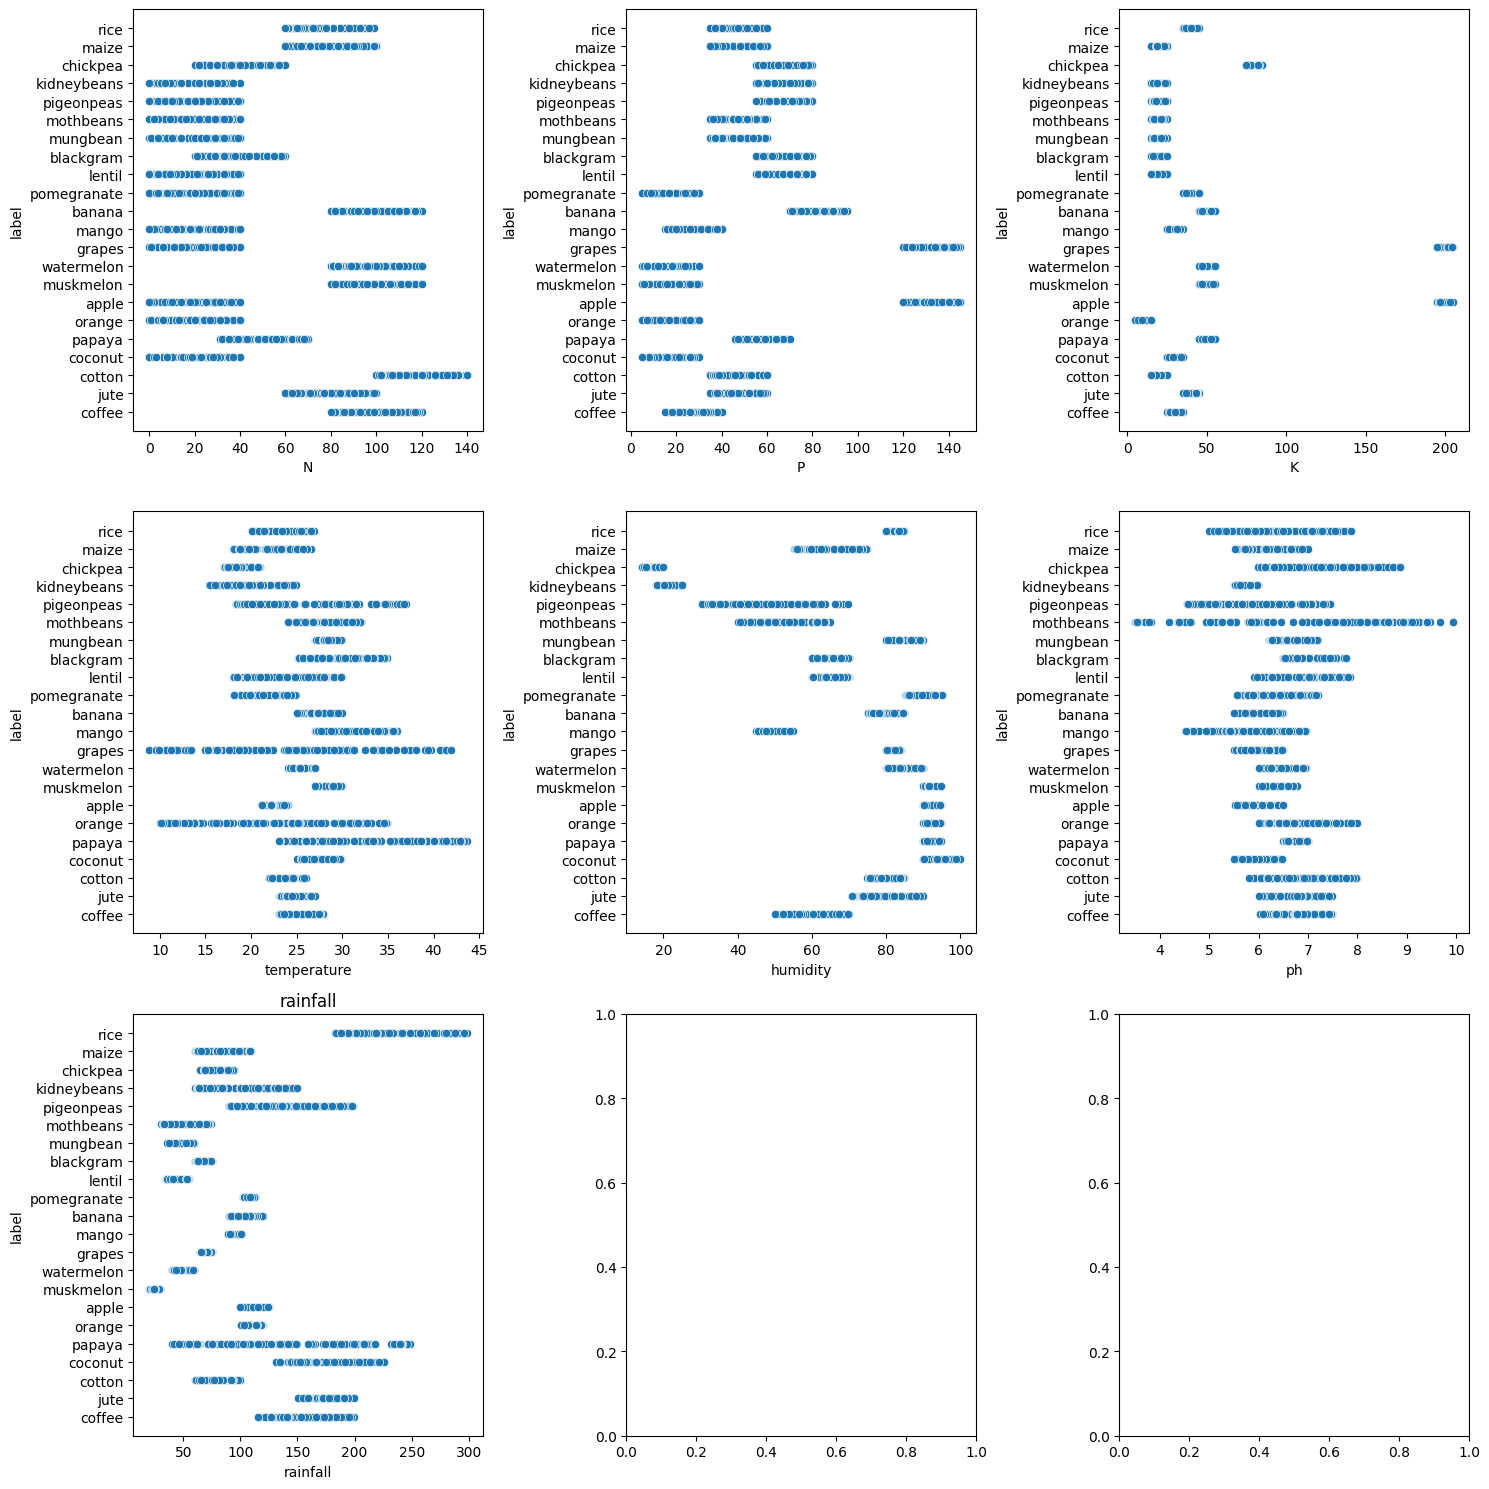

In [79]:
# Plotting Scatterplot

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(data=df, x=i, y='label', ax=subplot)
subplot.set_title(i)
plt.tight_layout()
plt.show()

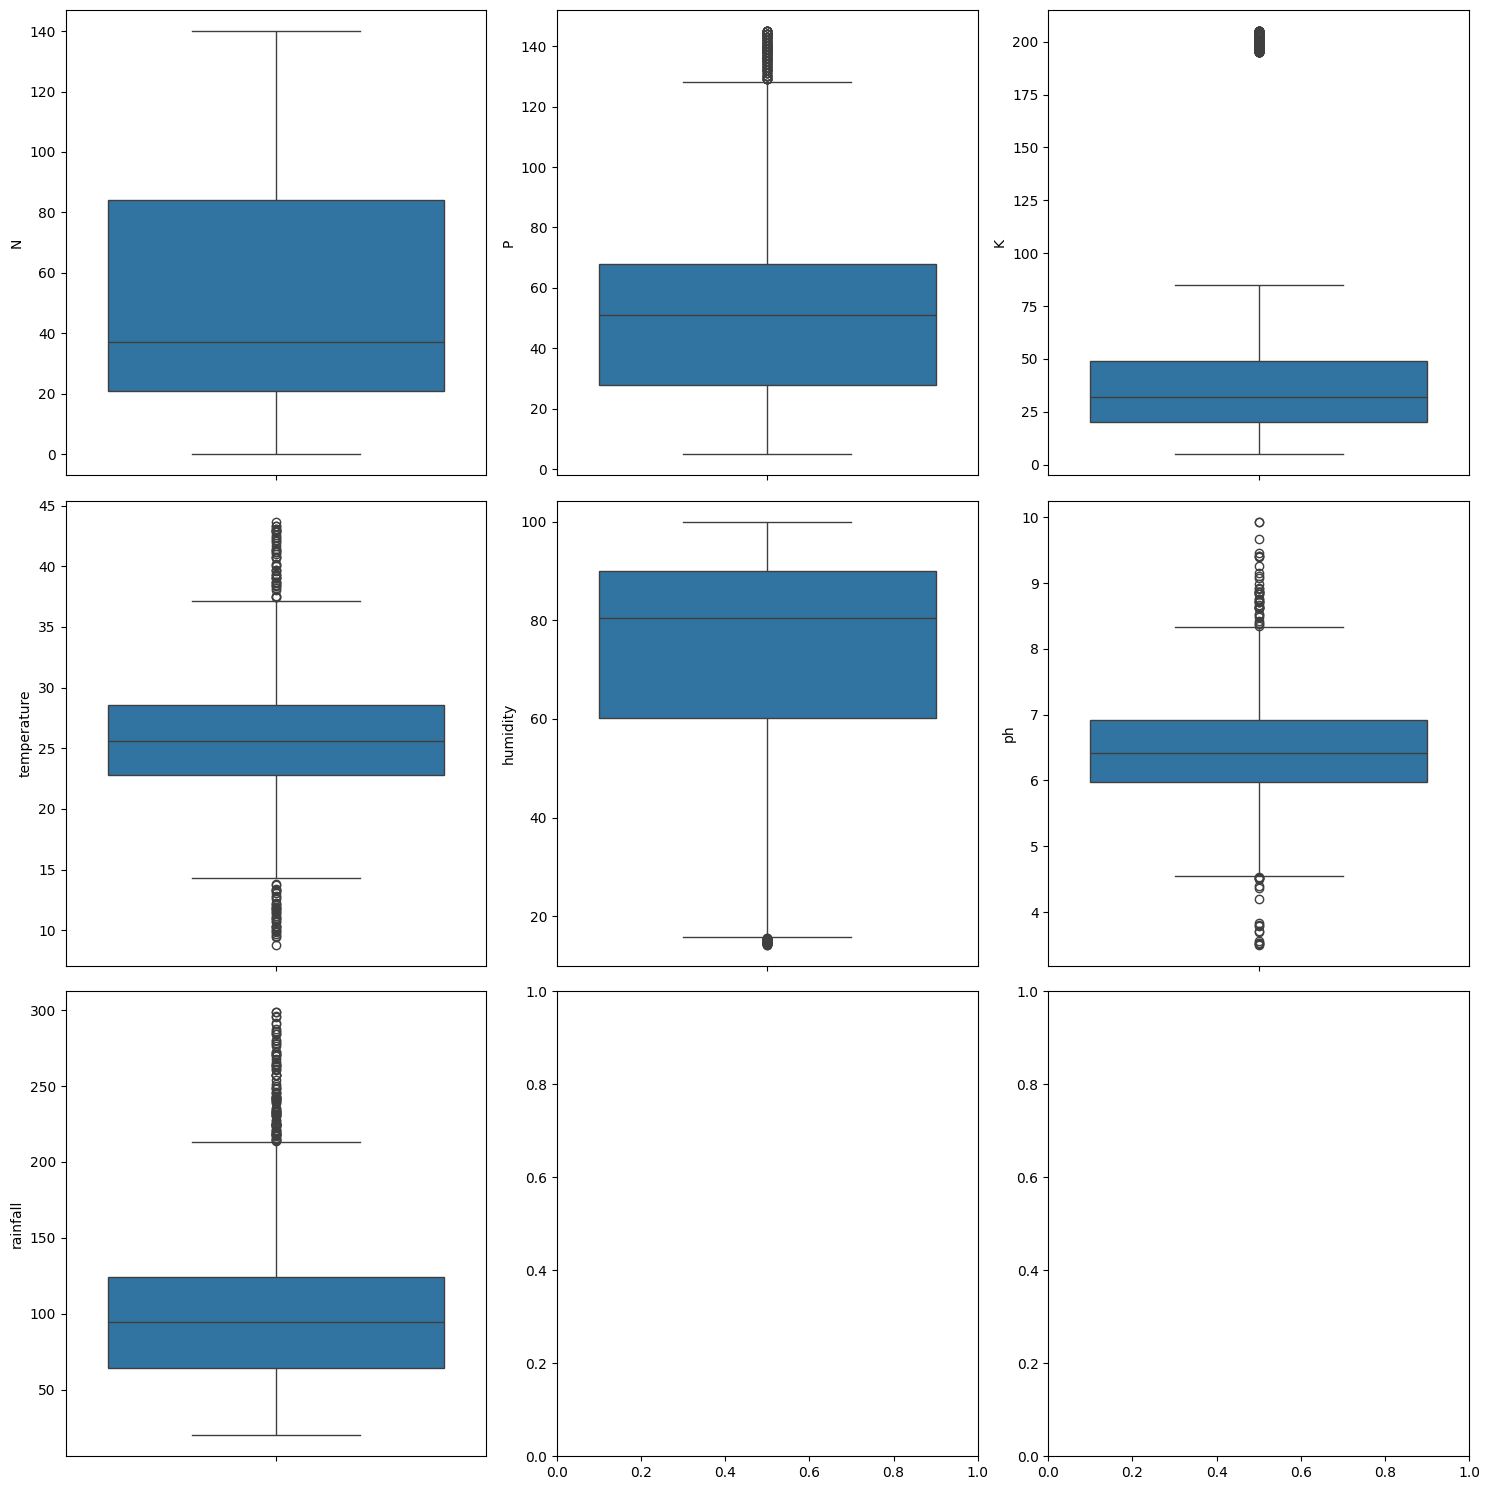

In [80]:
# finding outliers

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.tight_layout()
plt.show()


In [81]:
# corelation of the features

num_cols = df.select_dtypes(include=np.number)
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [82]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


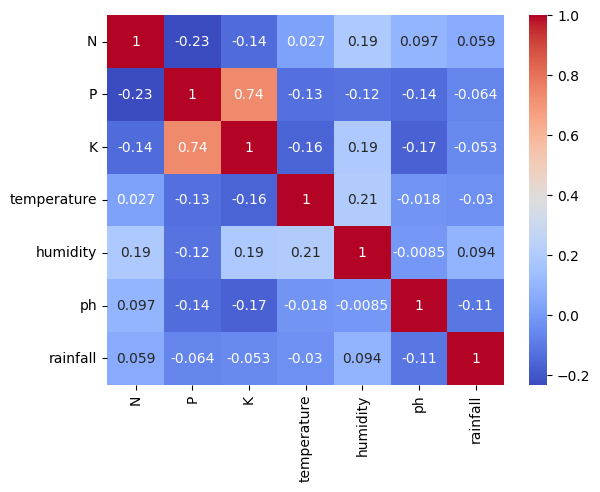

In [83]:
# visualizing the heatmap

sns.heatmap(corr , annot = True , cmap='coolwarm')
plt.show()

In [84]:
# start encoding

df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [85]:
crop_dict = {
    'rice' : 1 ,
    'maize' : 2,
    'chickpea' : 3 ,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8 ,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12 ,
    'grapes' : 13 ,
    'watermelon' : 14 ,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
}

In [86]:
df['crop_no'] = df['label'].map(crop_dict)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [87]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [88]:
df.drop('label' , axis=1 , inplace=True)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


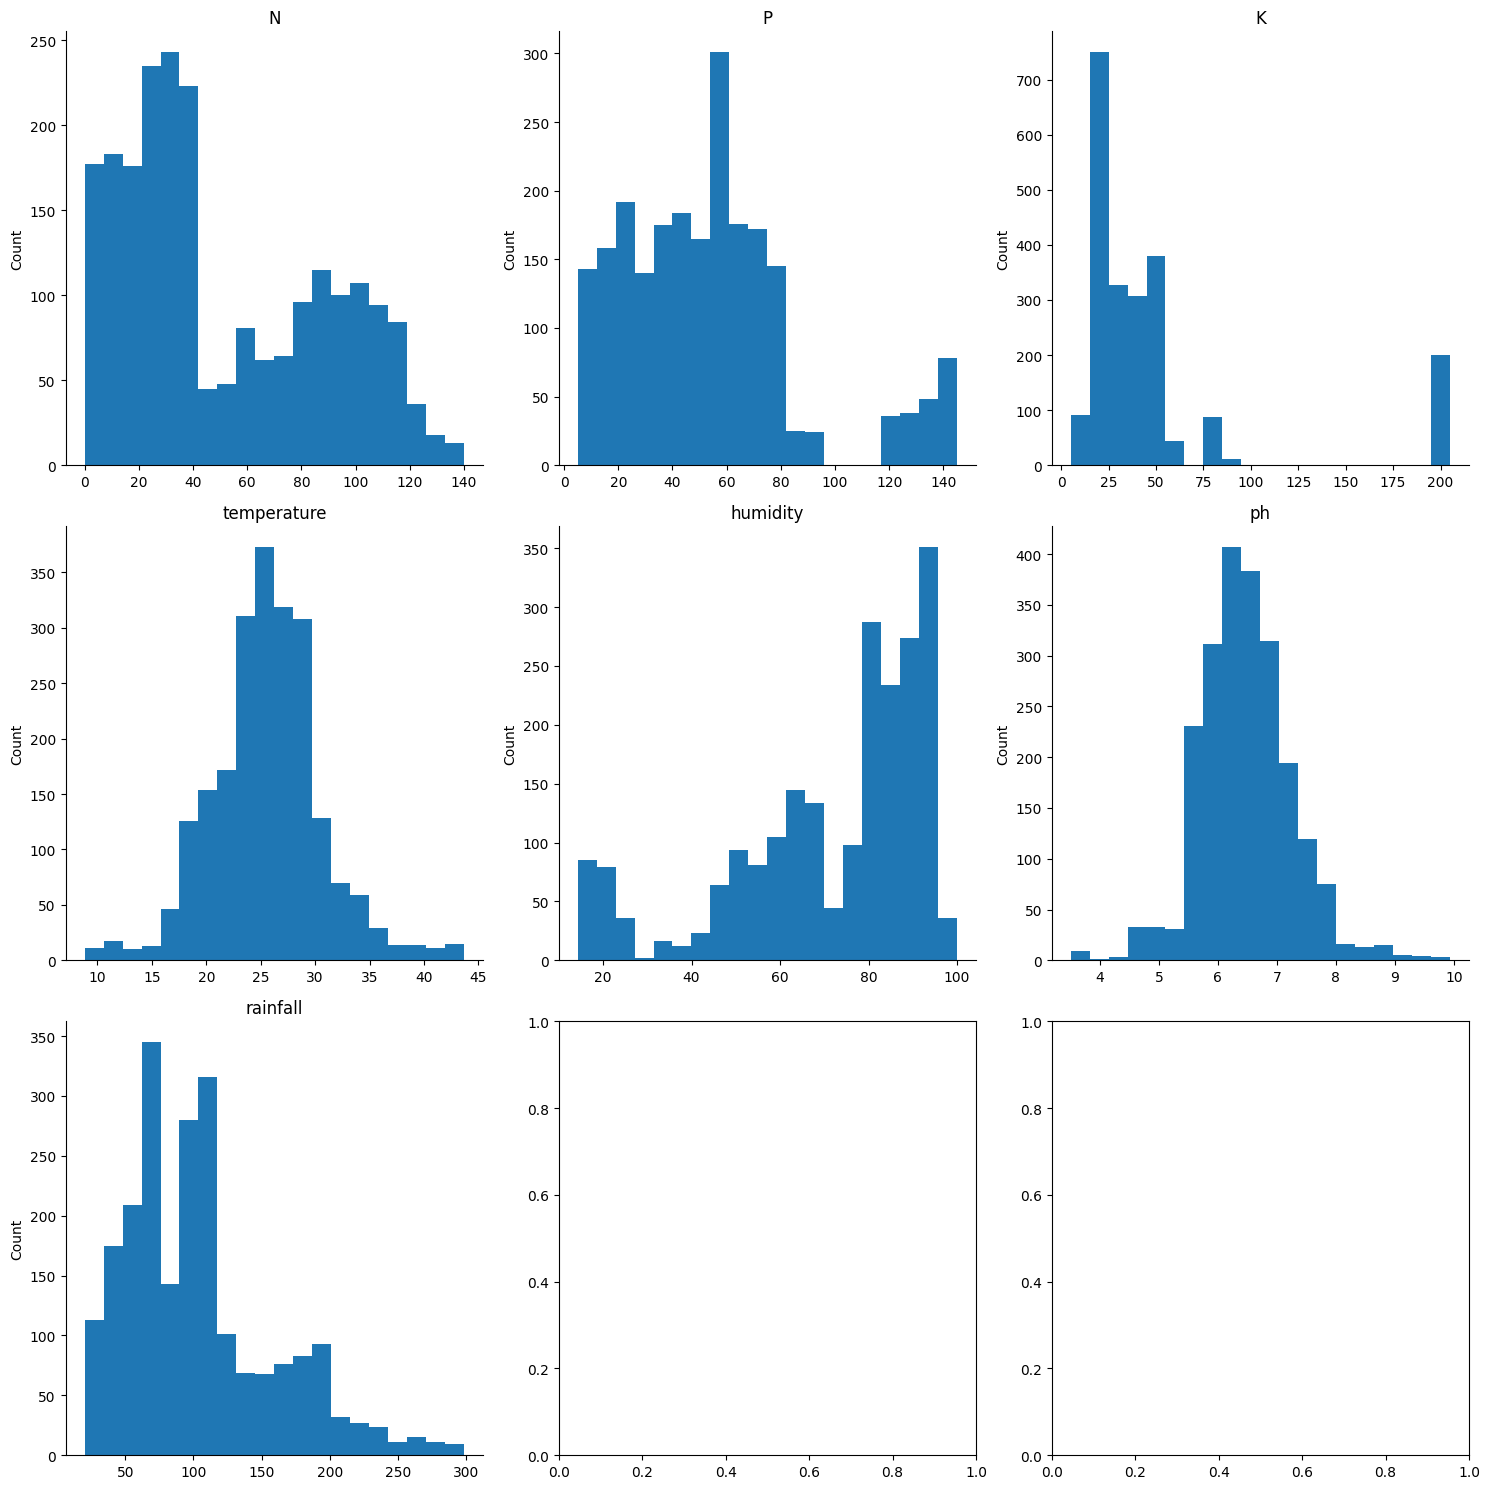

In [89]:
#visualizing hisplots

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    df[i].plot(kind='hist', bins=20, ax=subplot, title=i)
    subplot.spines[['top', 'right']].set_visible(False)
    subplot.set_xlabel('')
    subplot.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [90]:
# train test split

x = df.drop('crop_no' , axis=1)
y = df['crop_no']

In [91]:
x.shape

(2200, 7)

In [92]:
y.shape

(2200,)

In [93]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=85)

In [94]:
print("The number of data in X_Train has :",x_train.shape)
print("The number of data in X_Test has :",x_test.shape)
print("The number of data in Y_Train has :",y_train.shape)
print("The number of data in Y_Test has :",y_test.shape)

The number of data in X_Train has : (1760, 7)
The number of data in X_Test has : (440, 7)
The number of data in Y_Train has : (1760,)
The number of data in Y_Test has : (440,)


In [95]:
# Scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [96]:
# Training a model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scale , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [98]:
y_pred = dtc.predict(x_test_scale)
acs = accuracy_score(y_test , y_pred)
print("The accuracy score is :",acs)

The accuracy score is : 0.990909090909091


In [132]:
joblib.dump(dtc, 'crop_model.pkl')

['crop_model.pkl']

In [133]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [99]:
# Prediction

def prediction(N , P , K , temperature , humidity , ph , rainfall):
  features = np.array([[N , P , K , temperature , humidity , ph , rainfall]])
  features_scale = sc.transform(features)
  prediction = dtc.predict(features_scale).reshape(1, -1)
  crop_dict = {
          'rice' : 1 ,
    'maize' : 2,
    'chickpea' : 3 ,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8 ,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12 ,
    'grapes' : 13 ,
    'watermelon' : 14 ,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
  }
  crop = list(crop_dict.keys())[list(crop_dict.values()).index(prediction[0])]
  return crop

In [100]:
# Predicting with the values

N = 106
P = 68
K = 43
temperature = 24
humidity = 82
ph = 7
rainfall = 26

crop = prediction(N , P , K , temperature , humidity , ph , rainfall)
print("The recommended crop is :",crop)

The recommended crop is : banana


d:\Education\Coding\.conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
